<a href="https://colab.research.google.com/github/MatienkoAndrew/notebooks/blob/main/andrej_karpathy_mlp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt # for making figures
%matplotlib inline

In [ ]:
# download the names.txt file from github
!wget https://raw.githubusercontent.com/karpathy/makemore/master/names.txt

--2023-03-22 17:57:36--  https://raw.githubusercontent.com/karpathy/makemore/master/names.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 228145 (223K) [text/plain]
Saving to: ‘names.txt.1’

names.txt.1         100%[===================>] 222.80K  --.-KB/s    in 0.02s   

2023-03-22 17:57:37 (14.2 MB/s) - ‘names.txt.1’ saved [228145/228145]



In [ ]:
words = open('names.txt', 'r').read().splitlines()
words[:8]

['emma', 'olivia', 'ava', 'isabella', 'sophia', 'charlotte', 'mia', 'amelia']

In [ ]:
len(words)

32033

In [ ]:
# build the vocabulary of characters and mappings to/from integers
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}
print(itos)

{1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z', 0: '.'}


In [ ]:
# build the dataset
block_size = 3 # context length: how many characters do we take to predict the next one?

X, Y = [], []
for w in words[:1]:
    context = [0] * block_size
    for ch in w + '.':
        ix = stoi[ch]
        X.append(context)
        Y.append(ix)
        print(''.join(itos[i] for i in context), '--->', itos[ix])
        context = context[1:] + [ix] # crop and append

X = torch.tensor(X)
Y = torch.tensor(Y)
print(X.shape, Y.shape)

... ---> e
..e ---> m
.em ---> m
emm ---> a
mma ---> .
torch.Size([5, 3]) torch.Size([5])


In [ ]:
C = torch.randn((27, 2))

In [ ]:
emb = C[X]
emb.shape

torch.Size([5, 3, 2])

In [ ]:
##-- 6 нейронов: 3 * 2
##-- 100 нейронов: произвольное число на выходе
W1 = torch.randn((6, 100))
b1 = torch.randn(100)

In [ ]:
emb @ W1 + b1

RuntimeError: ignored

In [ ]:
emb

tensor([[[-0.8815, -0.3808],
         [-0.8815, -0.3808],
         [-0.8815, -0.3808]],

        [[-0.8815, -0.3808],
         [-0.8815, -0.3808],
         [ 0.0427, -0.2390]],

        [[-0.8815, -0.3808],
         [ 0.0427, -0.2390],
         [-0.2565,  1.9602]],

        [[ 0.0427, -0.2390],
         [-0.2565,  1.9602],
         [-0.2565,  1.9602]],

        [[-0.2565,  1.9602],
         [-0.2565,  1.9602],
         [ 0.4643,  0.7515]]])

In [ ]:
##-- first aproach
torch.cat([emb[:, 0, :], emb[:, 1, :], emb[:, 2, :]], dim=1), torch.cat([emb[:, 0, :], emb[:, 1, :], emb[:, 2, :]], dim=1).shape

(tensor([[-0.8815, -0.3808, -0.8815, -0.3808, -0.8815, -0.3808],
         [-0.8815, -0.3808, -0.8815, -0.3808,  0.0427, -0.2390],
         [-0.8815, -0.3808,  0.0427, -0.2390, -0.2565,  1.9602],
         [ 0.0427, -0.2390, -0.2565,  1.9602, -0.2565,  1.9602],
         [-0.2565,  1.9602, -0.2565,  1.9602,  0.4643,  0.7515]]),
 torch.Size([5, 6]))

In [ ]:
##-- second aproach
##-- exact that up
torch.cat(torch.unbind(emb, 1), 1), torch.cat(torch.unbind(emb, 1), 1).shape

(tensor([[-0.8815, -0.3808, -0.8815, -0.3808, -0.8815, -0.3808],
         [-0.8815, -0.3808, -0.8815, -0.3808,  0.0427, -0.2390],
         [-0.8815, -0.3808,  0.0427, -0.2390, -0.2565,  1.9602],
         [ 0.0427, -0.2390, -0.2565,  1.9602, -0.2565,  1.9602],
         [-0.2565,  1.9602, -0.2565,  1.9602,  0.4643,  0.7515]]),
 torch.Size([5, 6]))

In [ ]:
a = torch.arange(18)
a

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17])

In [ ]:
a.storage()

 0
 1
 2
 3
 4
 5
 6
 7
 8
 9
 10
 11
 12
 13
 14
 15
 16
 17
[torch.storage.TypedStorage(dtype=torch.int64, device=cpu) of size 18]

In [ ]:
##-- extremly efficient operation
a.view(3, 3, 2)

tensor([[[ 0,  1],
         [ 2,  3],
         [ 4,  5]],

        [[ 6,  7],
         [ 8,  9],
         [10, 11]],

        [[12, 13],
         [14, 15],
         [16, 17]]])

In [ ]:
##-- third aproach
emb.view((5, 6))

tensor([[-0.8815, -0.3808, -0.8815, -0.3808, -0.8815, -0.3808],
        [-0.8815, -0.3808, -0.8815, -0.3808,  0.0427, -0.2390],
        [-0.8815, -0.3808,  0.0427, -0.2390, -0.2565,  1.9602],
        [ 0.0427, -0.2390, -0.2565,  1.9602, -0.2565,  1.9602],
        [-0.2565,  1.9602, -0.2565,  1.9602,  0.4643,  0.7515]])

In [ ]:
##-- hidden state
h = emb.view(5, 6) @ W1 + b1

In [ ]:
h.shape

torch.Size([5, 100])

In [ ]:
h

tensor([[-2.7412,  0.5476,  0.2892,  1.8815, -0.6456,  3.1789, -1.0836, -1.6243,
         -3.8582, -1.9889, -2.5695,  0.2978, -1.4710, -4.5400, -1.3815,  0.3917,
         -0.0835,  0.2622, -2.0041,  2.7282,  3.2017,  0.8665,  0.7461, -1.4780,
          1.5524, -1.4989,  0.7715,  2.7688, -2.6677,  0.7991,  0.3784,  4.0016,
          1.6197,  0.7259, -2.2669, -0.4591, -1.4017, -0.5556,  2.5743, -0.1289,
         -0.1598, -2.3830, -1.3303, -1.3022, -2.0738,  0.7392, -0.3710,  2.1019,
         -0.8123,  2.6262,  2.8383, -0.5970,  1.3967, -1.9475, -3.6887,  2.1617,
          2.7498,  1.1010, -4.0838,  1.4693, -3.4095,  1.0139, -2.4407, -1.1668,
         -0.2910,  0.3841,  0.4287,  1.1442,  0.2637,  0.5990,  1.0185, -2.3419,
         -2.5321,  0.7347, -1.8675, -0.4421, -0.0297,  0.7696,  1.8828,  2.3922,
          0.5172, -0.2658,  4.2417,  1.1947,  3.6641, -2.2608,  3.5282, -0.6979,
         -2.4744,  2.6916,  2.7329, -2.3438, -1.3491, -1.8668,  2.2551, -3.0050,
         -1.2033, -1.1738, -

## Правильный вид

In [ ]:
##-- hidden state
h = torch.tanh(emb.view(-1, 6) @ W1 + b1)

In [ ]:
h.shape

torch.Size([5, 100])

In [ ]:
W2 = torch.randn((100, 27))
b2 = torch.randn(27)

In [ ]:
logits = h @ W2 + b2

In [ ]:
logits.shape

torch.Size([5, 27])

In [ ]:
counts = logits.exp()

In [ ]:
prob = counts / counts.sum(1, keepdims=True)

In [ ]:
prob

tensor([[1.0915e-08, 1.0727e-04, 4.0268e-01, 5.2274e-07, 4.1101e-09, 1.3208e-09,
         3.7657e-02, 2.9059e-08, 8.2371e-07, 4.5302e-07, 8.1718e-08, 3.8580e-11,
         1.0387e-02, 8.1487e-05, 1.1355e-09, 9.4239e-02, 1.6529e-11, 2.6368e-06,
         1.3208e-06, 1.7372e-06, 1.7677e-07, 2.9932e-09, 4.5458e-01, 4.9256e-05,
         5.3300e-10, 8.6622e-05, 1.2576e-04],
        [4.2117e-07, 1.4588e-03, 1.9355e-04, 1.4570e-09, 4.2311e-10, 2.8371e-07,
         3.8562e-02, 3.2251e-08, 5.1705e-04, 2.0186e-06, 1.2044e-08, 1.3030e-11,
         6.1003e-06, 1.8847e-01, 1.0463e-07, 6.9727e-03, 7.1219e-11, 9.1762e-08,
         4.7288e-07, 2.0694e-07, 8.0397e-06, 1.1725e-09, 6.9517e-01, 5.2804e-05,
         5.9165e-09, 2.4167e-06, 6.8584e-02],
        [1.5249e-08, 9.9670e-01, 1.1675e-05, 5.3233e-10, 3.0942e-11, 2.1827e-07,
         1.1726e-05, 3.8108e-15, 7.1701e-08, 7.9963e-10, 5.6118e-14, 3.3601e-14,
         9.1751e-07, 2.4129e-04, 2.6552e-07, 1.8433e-09, 1.6226e-12, 6.3689e-12,
         3.0288e-

In [ ]:
prob.shape

torch.Size([5, 27])

In [ ]:
Y

tensor([ 5, 13, 13,  1,  0])

In [ ]:
##-- get probability in target idx
prob[torch.arange(len(Y)), Y]


tensor([1.3208e-09, 1.8847e-01, 2.4129e-04, 6.5969e-06, 2.4762e-15])

In [ ]:
loss = -prob[torch.arange(len(Y)), Y].log().mean()
loss

tensor(15.2009)

In [ ]:
 ## -------------------------- now made respectable :) ----------------------- ##

In [ ]:
X.shape, Y.shape ##-- dataset

(torch.Size([5, 3]), torch.Size([5]))

In [ ]:
g = torch.Generator().manual_seed(2147483647)
C = torch.randn((27, 2), generator=g)
W1 = torch.randn((6, 100), generator=g)
b1 = torch.randn(100, generator=g)
W2 = torch.randn((100, 27), generator=g)
b2 = torch.randn(27, generator=g)
parameters = [C, W1, b1, W2, b2]

In [ ]:
sum(p.nelement() for p in parameters)

3481

In [ ]:
emb = C[X] ##-- (5, 3, 2)
h = torch.tanh(emb.view(-1, 6) @ W1 + b1) ##-- (5, 100)
logits = h @ W2 + b2 ##-- (5, 27)
# ##-- crossentropy
# counts = logits.exp()
# prob = counts / counts.sum(1, keepdims=True)
# loss = -prob[torch.arange(len(Y)), Y].log().mean()
loss = F.cross_entropy(logits, Y)
loss

tensor(24.9418)

In [ ]:
##-- 3 причины использовать crossentropy, а не самодельный код
###-- 1. оптимизирован forward pass
###-- 2. оптимизирован backward pass
###-- 3. числа не будут ломаться

'''
logits = torch.tensor([-2, 3, 0, 100])
counts = logits.exp()
prob = counts / counts.sum(1, keepdims=True) ##-- [0, 0, 0, nan] - потому что мы возвели в степерь 100 e^100 = +inf
##-- 

logits = torch.tensor([-2, 3, 0, 100]) - 100 ##-- crossentropy под капотом вычитает максимальное число - результат не меняется, но не будет ошибки
counts = logits.exp()
prob = counts / counts.sum(1, keepdims=True) ##-- [0, 0, 0, 1]
'''

'\nlogits = torch.tensor([-2, 3, 0, 100])\ncounts = logits.exp()\nprob = counts / counts.sum(1, keepdims=True) ##-- [0, 0, 0, nan] - потому что мы возвели в степерь 100 e^100 = +inf\n##-- \n\nlogits = torch.tensor([-2, 3, 0, 100]) - 100 ##-- crossentropy под капотом вычитает максимальное число - результат не меняется, но не будет ошибки\ncounts = logits.exp()\nprob = counts / counts.sum(1, keepdims=True) ##-- [0, 0, 0, 1]\n'

In [ ]:
 ## -------------------------- now made respectable :) ----------------------- ##

In [ ]:
X.shape, Y.shape ##-- dataset

(torch.Size([5, 3]), torch.Size([5]))

In [ ]:
g = torch.Generator().manual_seed(2147483647)
C = torch.randn((27, 2), generator=g)
W1 = torch.randn((6, 100), generator=g)
b1 = torch.randn(100, generator=g)
W2 = torch.randn((100, 27), generator=g)
b2 = torch.randn(27, generator=g)
parameters = [C, W1, b1, W2, b2]

In [ ]:
sum(p.nelement() for p in parameters)

3481

In [ ]:
for p in parameters:
    p.requires_grad = True

In [ ]:
for _ in range(100):
    ##-- forward pass
    emb = C[X] ##-- (5, 3, 2)
    h = torch.tanh(emb.view(-1, 6) @ W1 + b1) ##-- (5, 100)
    logits = h @ W2 + b2 ##-- (5, 27)
    loss = F.cross_entropy(logits, Y)
    print(loss.item())
    ##-- backward pass
    for p in parameters:
        p.grad = None
    loss.backward()
    ##-- update
    for p in parameters:
        p.data += -0.01 * p.grad

13.923504829406738
13.185992240905762
12.475647926330566
11.789244651794434
11.125843048095703
10.484864234924316
9.86548900604248
9.266763687133789
8.687784194946289
8.127886772155762
7.5869035720825195
7.0653181076049805
6.564135551452637
6.084297180175781
5.625845909118652
5.1875834465026855
4.767600059509277
4.364171028137207
3.976457118988037
3.6047492027282715
3.2503020763397217
2.9148802757263184
2.600118637084961
2.3070006370544434
2.035753011703491
1.7862064838409424
1.5582034587860107
1.3517131805419922
1.1665713787078857
1.0021944046020508
0.857644259929657
0.7319485545158386
0.6243023872375488
0.533876895904541
0.4594261646270752
0.3990829586982727
0.35054469108581543
0.3114566504955292
0.2797335088253021
0.2536848783493042
0.2320156991481781
0.21375255286693573
0.1981700211763382
0.18472638726234436
0.17301185429096222
0.16271308064460754
0.15358754992485046
0.14544495940208435
0.1381334364414215
0.1315314918756485
0.12554018199443817
0.12007772922515869
0.115076944231987


In [ ]:
##-- y_pred
logits.max(1)

torch.return_types.max(
values=tensor([13.9039, 16.9163, 18.5992, 14.7803, 13.3040], grad_fn=<MaxBackward0>),
indices=tensor([ 5, 13, 13,  1,  0]))

In [ ]:
Y

tensor([ 5, 13, 13,  1,  0])

In [ ]:
F.cross_entropy(logits, Y)

tensor(0.0395, grad_fn=<NllLossBackward0>)

In [ ]:
 ## -------------------------- ALL DATASET ----------------------- ##
 ## -------------------------- now made respectable :) ----------------------- ##

In [ ]:
# build the dataset
block_size = 3 # context length: how many characters do we take to predict the next one?

X, Y = [], []
for w in words:
    context = [0] * block_size
    for ch in w + '.':
        ix = stoi[ch]
        X.append(context)
        Y.append(ix)
        # print(''.join(itos[i] for i in context), '--->', itos[ix])
        context = context[1:] + [ix] # crop and append

X = torch.tensor(X)
Y = torch.tensor(Y)
print(X.shape, Y.shape)

torch.Size([228146, 3]) torch.Size([228146])


In [ ]:
X.shape, Y.shape ##-- dataset

(torch.Size([228146, 3]), torch.Size([228146]))

In [ ]:
g = torch.Generator().manual_seed(2147483647)
C = torch.randn((27, 2), generator=g)
W1 = torch.randn((6, 100), generator=g)
b1 = torch.randn(100, generator=g)
W2 = torch.randn((100, 27), generator=g)
b2 = torch.randn(27, generator=g)
parameters = [C, W1, b1, W2, b2]

In [ ]:
sum(p.nelement() for p in parameters)

3481

In [ ]:
for p in parameters:
    p.requires_grad = True

In [ ]:
##-- scheduling learning rate
lre = torch.linspace(-3, 0, 1000)
lrs = 10**lre
# lrs

In [ ]:
lri = []
lossi = []

for i in range(10000):
    ##-- minibatch construct (select random 32 elements)
    ix = torch.randint(0, X.shape[0], (32, ))

    ##-- forward pass
    emb = C[X[ix]] ##-- (32, 3, 2)
    h = torch.tanh(emb.view(-1, 6) @ W1 + b1) ##-- (32, 100)
    logits = h @ W2 + b2 ##-- (32, 27)
    loss = F.cross_entropy(logits, Y[ix])
    
    ##-- backward pass
    for p in parameters:
        p.grad = None
    loss.backward()
    ##-- update
    # lr = lrs[i]
    lr = 0.01
    for p in parameters:
        p.data += -lr * p.grad

    ##-- track stats
    # lri.append(lr)
    # lossi.append(loss.item())

In [ ]:
# plt.plot(lri, lossi)

In [ ]:
##-- Full loss
emb = C[X]
h = torch.tanh(emb.view(-1, 6) @ W1 + b1)
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Y)
loss

tensor(2.2882, grad_fn=<NllLossBackward0>)

# Train test split

In [ ]:
# train, dev/validation, test splits
# 80%, 10%, 10%

Train set используется для оптимизации параметров (весов модели)

Valid set используется для оптимизации гиперпараметров модели (количество деревьев, коэфициенты регуларизации и тд)

Test set используется для проверки качества модели

In [ ]:
# build the dataset
block_size = 3 # context length: how many characters do we take to predict the next one?

def build_dataset(words):
  X, Y = [], []
  for w in words:

    #print(w)
    context = [0] * block_size
    for ch in w + '.':
      ix = stoi[ch]
      X.append(context)
      Y.append(ix)
      #print(''.join(itos[i] for i in context), '--->', itos[ix])
      context = context[1:] + [ix] # crop and append

  X = torch.tensor(X)
  Y = torch.tensor(Y)
  print(X.shape, Y.shape)
  return X, Y

import random
random.seed(42)
random.shuffle(words)
n1 = int(0.8*len(words))
n2 = int(0.9*len(words))

Xtr, Ytr = build_dataset(words[:n1])
Xdev, Ydev = build_dataset(words[n1:n2])
Xte, Yte = build_dataset(words[n2:])

torch.Size([182625, 3]) torch.Size([182625])
torch.Size([22655, 3]) torch.Size([22655])
torch.Size([22866, 3]) torch.Size([22866])


In [ ]:
g = torch.Generator().manual_seed(2147483647) # for reproducibility
C = torch.randn((27, 10), generator=g)
W1 = torch.randn((30, 200), generator=g)
b1 = torch.randn(200, generator=g)
W2 = torch.randn((200, 27), generator=g)
b2 = torch.randn(27, generator=g)
parameters = [C, W1, b1, W2, b2]

In [ ]:
sum(p.nelement() for p in parameters) # number of parameters in total

11897

In [ ]:
for p in parameters:
  p.requires_grad = True

In [ ]:
lre = torch.linspace(-3, 0, 1000)
lrs = 10**lre

In [ ]:
lri = []
lossi = []
stepi = []

In [ ]:
for i in range(200000):
  
  # minibatch construct
  ix = torch.randint(0, Xtr.shape[0], (32,))
  
  # forward pass
  emb = C[Xtr[ix]] # (32, 3, 2)
  h = torch.tanh(emb.view(-1, 30) @ W1 + b1) # (32, 100)
  logits = h @ W2 + b2 # (32, 27)
  loss = F.cross_entropy(logits, Ytr[ix])
  #print(loss.item())
  
  # backward pass
  for p in parameters:
    p.grad = None
  loss.backward()
  
  # update
  #lr = lrs[i]
  lr = 0.1 if i < 100000 else 0.01
  for p in parameters:
    p.data += -lr * p.grad

  # track stats
  #lri.append(lre[i])
  stepi.append(i)
  lossi.append(loss.log10().item())

#print(loss.item())

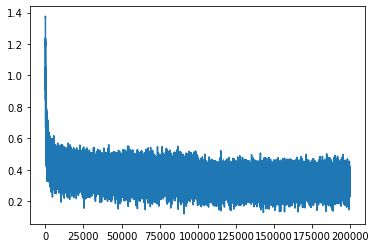

In [ ]:
plt.plot(stepi, lossi)

In [ ]:
# training loss 
emb = C[Xtr] # (32, 3, 2)
h = torch.tanh(emb.view(-1, 30) @ W1 + b1) # (32, 100)
logits = h @ W2 + b2 # (32, 27)
loss = F.cross_entropy(logits, Ytr)
loss

tensor(2.1329, grad_fn=<NllLossBackward0>)

In [ ]:
# validation loss
emb = C[Xdev] # (32, 3, 2)
h = torch.tanh(emb.view(-1, 30) @ W1 + b1) # (32, 100)
logits = h @ W2 + b2 # (32, 27)
loss = F.cross_entropy(logits, Ydev)
loss

tensor(2.1727, grad_fn=<NllLossBackward0>)

In [ ]:
# test loss
emb = C[Xte] # (32, 3, 2)
h = torch.tanh(emb.view(-1, 30) @ W1 + b1) # (32, 100)
logits = h @ W2 + b2 # (32, 27)
loss = F.cross_entropy(logits, Yte)
loss

tensor(2.1726, grad_fn=<NllLossBackward0>)

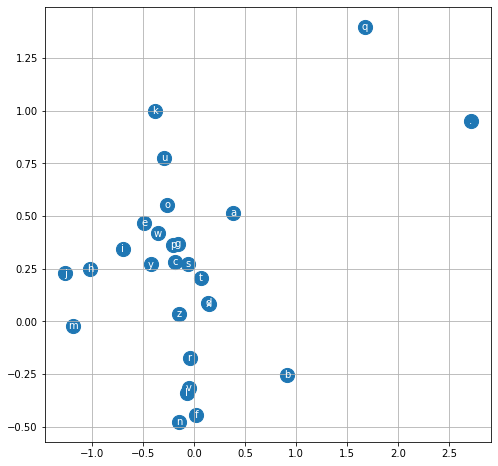

In [ ]:
# visualize dimensions 0 and 1 of the embedding matrix C for all characters
plt.figure(figsize=(8,8))
plt.scatter(C[:,0].data, C[:,1].data, s=200)
for i in range(C.shape[0]):
    plt.text(C[i,0].item(), C[i,1].item(), itos[i], ha="center", va="center", color='white')
plt.grid('minor')

# Generate

In [ ]:
##-- sample from the model
g = torch.Generator().manual_seed(2147483647 + 10)


for _ in range(20):
    out = []

    context = [0] * block_size

    while True:
        emb = C[torch.tensor([context])]
        h = torch.tanh(emb.view(1, -1) @ W1 + b1)
        logits = h @ W2 + b2
        probs = F.softmax(logits, dim=1)

        ix = torch.multinomial(probs, num_samples=1, replacement=True, generator=g).item()
        context = context[1:] + [ix]

        out.append(ix)
        if ix == 0:
            break

    print(''.join(itos[i] for i in out))

osy.
jergiel.
mabdulan.
fran.
mycaidlyontson.
sima.
eyrathlya.
saresham.
naviano.
mackyah.
renica.
ell.
beaur.
ler.
alvyqia.
abbizhia.
carlynn.
dren.
avalen.
lice.


In [ ]:
! touch mlp.py

In [ ]:
#@title script
script = \
"""
import torch
import torch.nn.functional as F
import random
random.seed(42)

# download the names.txt file from github
# ! wget https://raw.githubusercontent.com/karpathy/makemore/master/names.txt

words = open('names.txt', 'r').read().splitlines()

# build the vocabulary of characters and mappings to/from integers
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}

##-- build the dataset
block_size = 3 # context length: how many characters do we take to predict the next one?

def build_dataset(words):
  X, Y = [], []
  for w in words:

    #print(w)
    context = [0] * block_size
    for ch in w + '.':
      ix = stoi[ch]
      X.append(context)
      Y.append(ix)
      #print(''.join(itos[i] for i in context), '--->', itos[ix])
      context = context[1:] + [ix] # crop and append

  X = torch.tensor(X)
  Y = torch.tensor(Y)
  print(X.shape, Y.shape)
  return X, Y

random.shuffle(words)
n1 = int(0.8*len(words))
n2 = int(0.9*len(words))

Xtr, Ytr = build_dataset(words[:n1])
Xdev, Ydev = build_dataset(words[n1:n2])
Xte, Yte = build_dataset(words[n2:])

##-- parameters
g = torch.Generator().manual_seed(2147483647) # for reproducibility
C = torch.randn((27, 10), generator=g)
W1 = torch.randn((30, 200), generator=g)
b1 = torch.randn(200, generator=g)
W2 = torch.randn((200, 27), generator=g)
b2 = torch.randn(27, generator=g)
parameters = [C, W1, b1, W2, b2]



for p in parameters:
  p.requires_grad = True


lre = torch.linspace(-3, 0, 1000)
lrs = 10**lre

lri = []
lossi = []
stepi = []


for i in range(1000):
  
  # minibatch construct
  ix = torch.randint(0, Xtr.shape[0], (32,))
  
  # forward pass
  emb = C[Xtr[ix]] # (32, 3, 2)
  h = torch.tanh(emb.view(-1, 30) @ W1 + b1) # (32, 100)
  logits = h @ W2 + b2 # (32, 27)
  loss = F.cross_entropy(logits, Ytr[ix])
  if i % 100 == 0:
    print(i, loss.item())
  
  # backward pass
  for p in parameters:
    p.grad = None
  loss.backward()
  
  # update
  #lr = lrs[i]
  lr = 0.1 if i < 100000 else 0.01
  for p in parameters:
    p.data += -lr * p.grad

  # track stats
  #lri.append(lre[i])
  stepi.append(i)
  lossi.append(loss.log10().item())

#print(loss.item())

# training loss 
emb = C[Xtr] # (32, 3, 2)
h = torch.tanh(emb.view(-1, 30) @ W1 + b1) # (32, 100)
logits = h @ W2 + b2 # (32, 27)
loss = F.cross_entropy(logits, Ytr)
print('Training loss', loss)


# validation loss
emb = C[Xdev] # (32, 3, 2)
h = torch.tanh(emb.view(-1, 30) @ W1 + b1) # (32, 100)
logits = h @ W2 + b2 # (32, 27)
loss = F.cross_entropy(logits, Ydev)
print('Validation loss', loss)


# test loss
emb = C[Xte] # (32, 3, 2)
h = torch.tanh(emb.view(-1, 30) @ W1 + b1) # (32, 100)
logits = h @ W2 + b2 # (32, 27)
loss = F.cross_entropy(logits, Yte)
print('Test loss', loss)


##-- generate

##-- sample from the model
g = torch.Generator().manual_seed(2147483647 + 10)


for _ in range(20):
    out = []

    context = [0] * block_size

    while True:
        emb = C[torch.tensor([context])]
        h = torch.tanh(emb.view(1, -1) @ W1 + b1)
        logits = h @ W2 + b2
        probs = F.softmax(logits, dim=1)

        ix = torch.multinomial(probs, num_samples=1, replacement=True, generator=g).item()
        context = context[1:] + [ix]

        out.append(ix)
        if ix == 0:
            break

    print(''.join(itos[i] for i in out))
"""

In [ ]:
FILENAME = 'mlp.py'
with open(FILENAME, 'w') as file:
    file.write(script)

In [ ]:
! python mlp.py

torch.Size([182625, 3]) torch.Size([182625])
torch.Size([22655, 3]) torch.Size([22655])
torch.Size([22866, 3]) torch.Size([22866])
0 28.3929500579834
100 6.603984355926514
200 7.730443954467773
300 6.017655372619629
400 6.749285697937012
500 5.968642711639404
600 3.472696304321289
700 5.705581188201904
800 4.8704423904418945
900 4.584067344665527
Training loss tensor(3.7762, grad_fn=<NllLossBackward0>)
Validation loss tensor(3.7607, grad_fn=<NllLossBackward0>)
Test loss tensor(3.7962, grad_fn=<NllLossBackward0>)
rov.
jerhcadjit.
chi.
odroeivttia.
caytesyda.
shla.
eyt.
werri.
sezai.
kairyci.
trada.
nys.
fremiiah.
cee.
easn.
kayl.
jowydt.
abeai.
tema.
nizai.
